# Import training dataset

In [45]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Rescaling
import tensorflow as tf; tf.config.set_visible_devices([], 'GPU')

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images / 255.0
test_images = tf.expand_dims(test_images, axis=-1)
test_images = Rescaling(scale=1.0 / 255.0)(test_images)

# Build CNN

In [46]:
model = Sequential(name="First_CNN")

model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# CNN Model Information

In [47]:
model.summary()

Model: "First_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_9 (Flatten)         (None, 576)               0 

# Train CNN Model

In [48]:
model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=32,
    validation_data=(test_images, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5841 - accuracy: 0.8371 - val_loss: 0.1698 - val_accuracy: 0.9465
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1327 - accuracy: 0.9593 - val_loss: 0.1083 - val_accuracy: 0.9650
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0880 - accuracy: 0.9728 - val_loss: 0.0624 - val_accuracy: 0.9819
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0692 - accuracy: 0.9783 - val_loss: 0.0527 - val_accuracy: 0.9850
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0576 - accuracy: 0.9823 - val_loss: 0.0462 - val_accuracy: 0.9860
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0492 - accuracy: 0.9851 - val_loss: 0.0480 - val_accuracy: 0.9840
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0426 - accuracy: 0.9871 - val_loss: 0.0387 - val_ac

# Test model

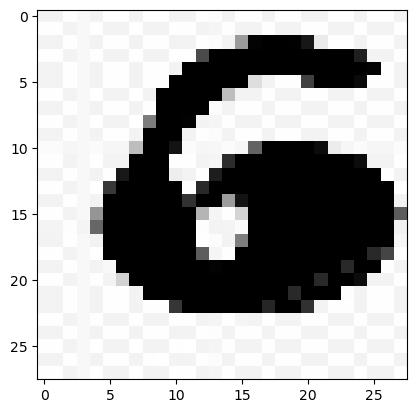

In [49]:
import matplotlib.pyplot as plt
import cv2 as cv

def preprocess_image(image_path):
    img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    img = cv.resize(img, (28, 28))
    img = img.astype('float32')
    img = img.reshape(784, 1)
    img = 255-img
    img /= 255.0
    img = img.reshape(1,28,28,1)

    return img

image = preprocess_image('test.png')  # 전처리된 이미지 얻기

plt.imshow(image.reshape(28, 28), cmap='Greys')
plt.show()

In [51]:
@tf.function
def predict_image(model, image):
    return model(image)  # model.predict가 아니라 model(image)를 호출

pred = predict_image(model, image)  # 전처리된 이미지를 모델에 전달하여 예측
# print(pred) # shpae: (1,10)
print(f'predicted number = {pred.numpy().argmax()}')

predicted number = 6


### tf.function 데코레이터
    - @tf.function을 통해 Keras 모델의 __call__ 메서드를 호출하는 경우, 실제로 model.predict, model.fit, model.evaluate와 같은 특정 메서드 호출이 아니라 모델 자체에 입력 데이터를 직접 전달
    - 이는 예측(inference)을 수행하는 행위로 볼 수 있다.

### numpy() 메서드
    - TensorFlow 텐서를 NumPy 배열로 변환하는 메서드